# Assigment HCI - Ferraud, Russo
## Analisi del dataset contenente dati sul mondo degli anime
In questo file è presente la nostra analisi dei dati contenuti nei file csv del dataset fornito, lo scopo è stato quello di dare un significato concreto ai numeri che trovavamo stampando grafici e colonne.

In [32]:
import pandas as pd
%pip install matplotlib
%pip install geopandas
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
from collections import Counter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Qual'è il ruolo dei personaggi negli anime?
Come prima parte della nostra analisi abbiamo deciso di unire tutti i dati che in qualche modo ci davano informazioni sui personaggi (characters), dal file risultante abbiamo notato una colonna particolarmente interessante ovvero la colonna che riportava il ruolo dei personaggi nei rispettivi anime.
Analizzando quindi i dati contenuti nella colonna abbiamo realizzato il seguente grafico:

In [23]:
characterAW_df = pd.read_csv('character_anime_works.csv')
characterAW_df = characterAW_df.drop(columns=['character_name'])
characterAW_df.head()
characterNN_df = pd.read_csv('character_nicknames.csv')
characterNN_df.head()
character_df = pd.read_csv('characters.csv')
character_df = character_df.drop(columns=['url', 'name_kanji', 'image', 'about'])
character_df.head()
# Merge sequentially (fix typo 'hoew' -> 'how' and don't pass three dataframes to pd.merge)
character_df = pd.merge(character_df, characterAW_df, on='character_mal_id', how='left')
character_df = pd.merge(character_df, characterNN_df, on='character_mal_id', how='left')
character_df.drop_duplicates(subset=['character_mal_id'], inplace=True)
character_df.head()

,character_mal_id,name,favorites,anime_mal_id,role,nickname
0,280386.0,Envi Mel Champagne,0.0,59846.0,Supporting,NaN
1,280354.0,Eleven,0.0,60071.0,Supporting,NaN
2,280353.0,Stud,0.0,60071.0,Supporting,NaN
3,280352.0,Judge,0.0,60071.0,Supporting,NaN
4,280339.0,Eiji Kurokawa,0.0,60531.0,Supporting,NaN


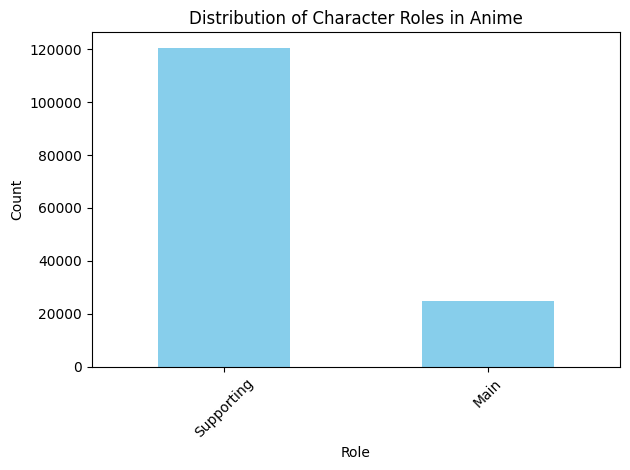

In [24]:
character_df['role'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribution of Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Il grafico che abbiamo realizzato mostra semplicemente che il numero di personaggi secondari è di gran lunga maggiore rispetto al numero di personaggi protagonisti.  
Ovviamente questo dato è prevedibile e infatti preso singolarmente non ci direbbe nulla di interessante, per questo motivo abbiamo deciso di analizzare più a fondo questo dato combinandolo con la colonna in cui era riportato il valore 'favorites'.  
In questo modo abbiamo ottenuto il seguente grafico:

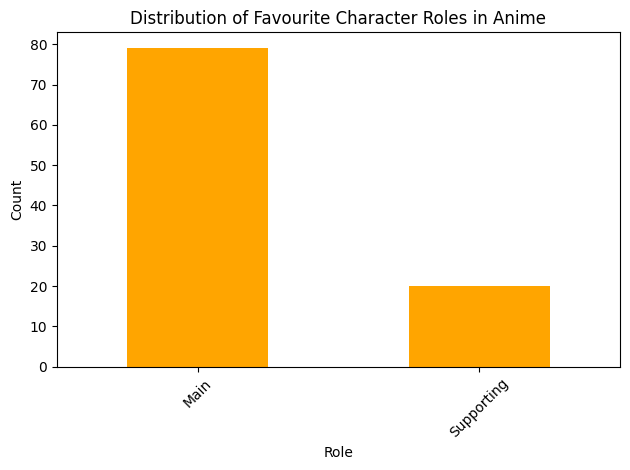

In [25]:
top100 = character_df.nlargest(100, 'favorites')
top100['role'].value_counts().plot(kind='bar', color='orange')

plt.title('Distribution of Favourite Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grazie a questa analisi più appofondita (su un campione contenente i 100 personaggi più amati) possiamo vedere il grafico in modo completamente opposto a quello precedente e affermare che i protagonisti del mondo anime sono di gran lunga i più amati dai fan.   
In questo modo abbiamo analizzato i ruoli dei personaggi in due vesti, quantità e gradimento e analizzato in modo completo questo aspetto.  
Per confermare i dati presenti nel grafico abbiamo voluto riportare direttamente la tabella con i 10 personaggi più amati dal pubblico così da dare confermare la nostra analisi:

In [27]:
top10 = character_df.nlargest(10, 'favorites')
top10

,character_mal_id,name,favorites,anime_mal_id,role,nickname
321863,417.0,Lelouch Lamperouge,175632.0,56835.0,Supporting,Lelouch vi Britannia
324813,40.0,Luffy Monkey D.,145750.0,52139.0,Main,Mugiwara
230905,45627.0,Levi,144452.0,16498.0,Supporting,NaN
324292,71.0,L Lawliet,129333.0,1535.0,Main,Ryuga Hideki
324443,62.0,Zoro Roronoa,114319.0,52139.0,Main,Pirate Hunter
324988,27.0,Killua Zoldyck,99726.0,136.0,Main,Kil
324278,80.0,Light Yagami,98487.0,1535.0,Main,Kira
245528,35252.0,Rintarou Okabe,98037.0,9253.0,Main,Hououin Kyouma
325109,11.0,Edward Elric,89644.0,121.0,Main,Ed
325015,17.0,Naruto Uzumaki,86322.0,35072.0,Supporting,Nine-Tails Jinchuuriki


## Details
Dopo aver visto qualche curiosità sui personaggi il passaggio successivo è stato quello di concentrarci sugli anime stessi dei quali avevamo dati vari e interessanti contenuti in uno dei file csv.
Abbiamo finito l'analisi dei personaggi elencanco in una tabella i dieci più amati, ora iniziamo l'analisi sugli anime proprio mostrando i dieci che presentano il valore maggiore nella colonna 'favorites':

In [28]:
details_df = pd.read_csv('details.csv')
pd.set_option('display.max_columns', None)
details_df = details_df.drop(columns=['url', 'title_japanese', 'image_url', 'synopsis', 'members', 'themes', 'demographics', 'source','rating','producers', 'explicit_genres', 'licensors', 'streaming'])
details_df['start_date'] = pd.to_datetime(details_df['start_date'])
details_df.drop_duplicates(subset=['mal_id'], inplace=True)
details_df.head()

,mal_id,title,type,status,score,scored_by,start_date,end_date,rank,popularity,favorites,genres,studios,episodes,season,year
0,59356,-Socket-,Movie,Finished Airing,NaN,NaN,2010-01-01 00:00:00+00:00,NaN,17086.0,22507,0,['Comedy'],[],1.0,NaN,NaN
1,56036,......,Music,Finished Airing,6.53,503.0,2023-06-11 00:00:00+00:00,NaN,NaN,15004,2,"['Horror', 'Supernatural']",['Flat Studio'],1.0,NaN,NaN
2,2928,.hack//G.U. Returner,OVA,Finished Airing,6.65,9745.0,2007-01-18 00:00:00+00:00,NaN,6366.0,5056,31,"['Adventure', 'Drama', 'Fantasy']",['Bee Train'],1.0,NaN,NaN
3,3269,.hack//G.U. Trilogy,Movie,Finished Airing,7.06,15373.0,2007-12-22 00:00:00+00:00,NaN,4194.0,4215,104,"['Action', 'Fantasy']",['CyberConnect2'],1.0,NaN,NaN
4,4469,.hack//G.U. Trilogy: Parody Mode,Special,Finished Airing,6.35,4317.0,2008-03-25 00:00:00+00:00,NaN,8182.0,6696,10,"['Comedy', 'Fantasy', 'Sci-Fi']",[],1.0,NaN,NaN


In [30]:
top_ranked = details_df.sort_values('favorites', ascending=False).head(10)[['title', 'favorites', 'rank', 'genres']]
top_ranked.reset_index(drop=True, inplace=True)
top_ranked.index = top_ranked.index + 1

top_ranked.style \
    .format({'rank': '{:.0f}'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

,title,favorites,rank,genres
1,One Piece,243358,55,"['Action', 'Adventure', 'Fantasy']"
2,Fullmetal Alchemist: Brotherhood,236754,2,"['Action', 'Adventure', 'Drama', 'Fantasy']"
3,Hunter x Hunter (2011),223927,7,"['Action', 'Adventure', 'Fantasy']"
4,Steins;Gate,198245,3,"['Drama', 'Sci-Fi', 'Suspense']"
5,Shingeki no Kyojin,183305,118,"['Action', 'Award Winning', 'Drama', 'Suspense']"
6,Death Note,181989,96,"['Supernatural', 'Suspense']"
7,Naruto: Shippuuden,118013,320,"['Action', 'Adventure', 'Fantasy']"
8,Code Geass: Hangyaku no Lelouch,114139,64,"['Action', 'Award Winning', 'Drama', 'Sci-Fi']"
9,Shinseiki Evangelion,114076,247,"['Action', 'Avant Garde', 'Award Winning', 'Drama', 'Sci-Fi', 'Suspense']"
10,Kimi no Na wa.,94186,32,"['Award Winning', 'Drama']"


### Quali sono i generi più presenti nel mondo anime?
Nella tabella mostrata in precedenza abbiamo volutamente lasciato la colonna 'genres' per poterci collegare in modo coerente ai dati del nuovo file, andiamo quindi ad analizzare quali sono i generi più amati aiutandoci con un grafico.  
Il nostro scopo è quello di capire quale categoria o genere sia il più popolare in termini di numero di anime presenti sul mercato.

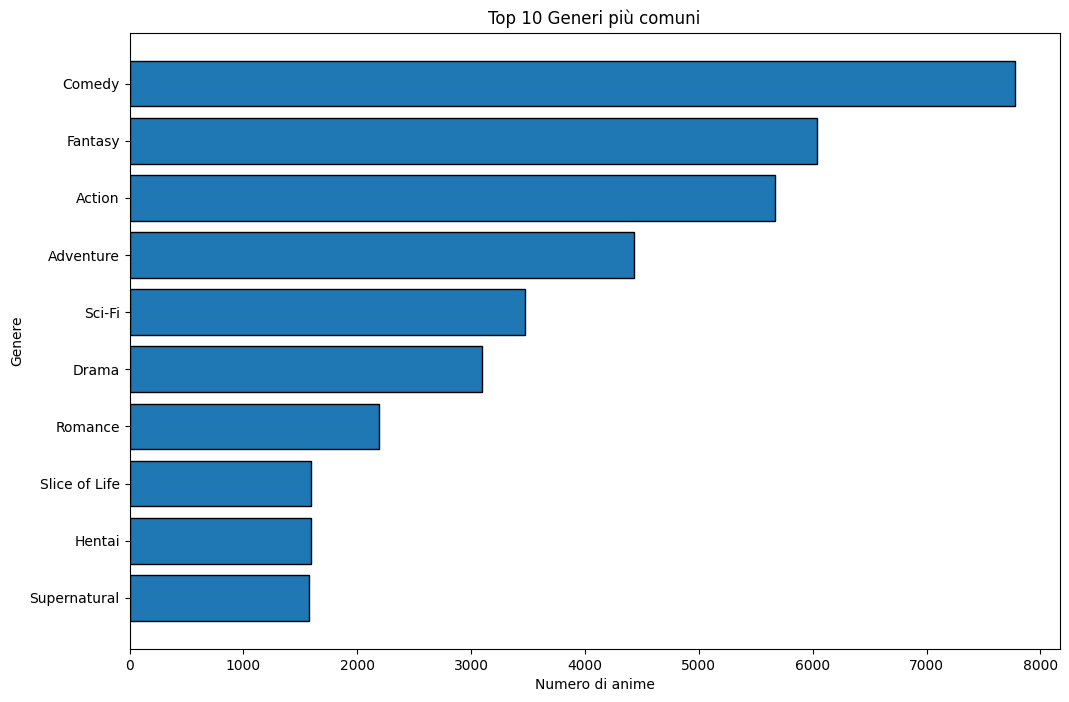

In [33]:
all_genres = []
for gen in details_df['genres'].dropna():
    genres_list = gen.split(', ')
    for g in genres_list:
        cleaned = g.strip("[]'\"")
        if cleaned:
            all_genres.append(cleaned)

genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

# Grafico
genres, counts = zip(*top_genres)
plt.figure(figsize=(12, 8))
plt.barh(genres, counts, edgecolor='black')
plt.title('Top 10 Generi più comuni')
plt.xlabel('Numero di anime')
plt.ylabel('Genere')
plt.gca().invert_yaxis()
plt.show()

Grazie al grafico è possibile avere un quadro generale dei generi principali sugli anime, il principale è la commedia quindi i film e le serie più prodotti sono generalmente divertenti e a scopo di intrattenimento.
Questo dato è interessante perchè può indirettamente mostrarci cosa preferisce il pubblico in quanto la produzione rispetta sempre la regola della domanda e offerta.  

Si può notare una cosa molto interessante, il genere commedy non è presente tra i top10 anime preferiti dal pubblico.
Ora una domanda interessante è capire se sono principalmente filf, serie TV, OVA, special ecc...

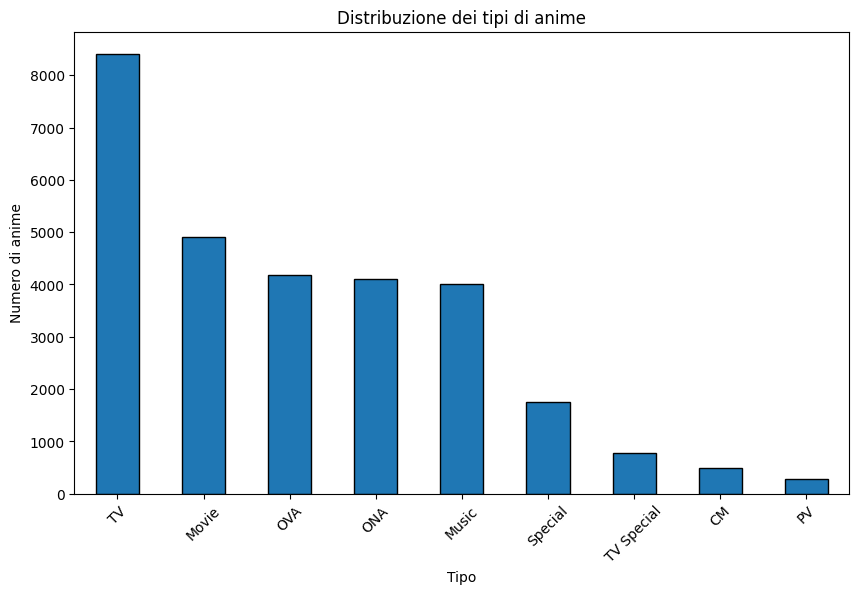

In [37]:
# Distribuzione dei tipi di anime
plt.figure(figsize=(10, 6))
details_df['type'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribuzione dei tipi di anime')
plt.xlabel('Tipo')
plt.ylabel('Numero di anime')
plt.xticks(rotation=45)
plt.show()

Possiamo notare come le serie TV siano le più prodotte con un margine abbastanza considerevole, seguito dai film, OVA ecc. che sono abbastanza simili.

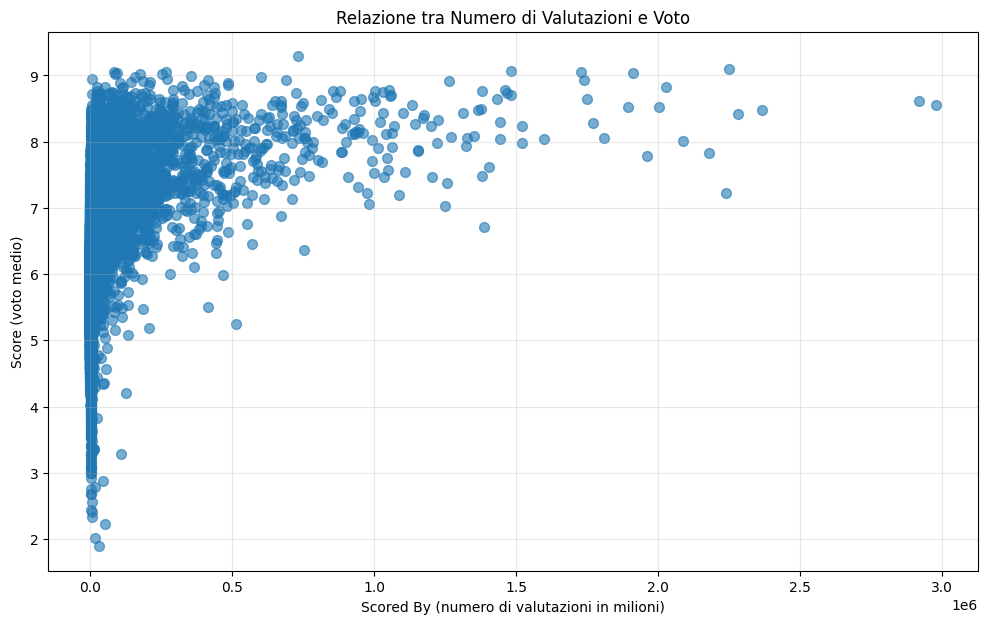

In [40]:
plt.figure(figsize=(12, 7))
plt.scatter(details_df['scored_by'], details_df['score'], alpha=0.6, s=50)
plt.xlabel('Scored By (numero di valutazioni in milioni)')
plt.ylabel('Score (voto medio)')
plt.title('Relazione tra Numero di Valutazioni e Voto')
plt.grid(True, alpha=0.3)
plt.show()

Con questo grafico possiamo notare che gli anime con uno score più alto sono anche tra i più votati.

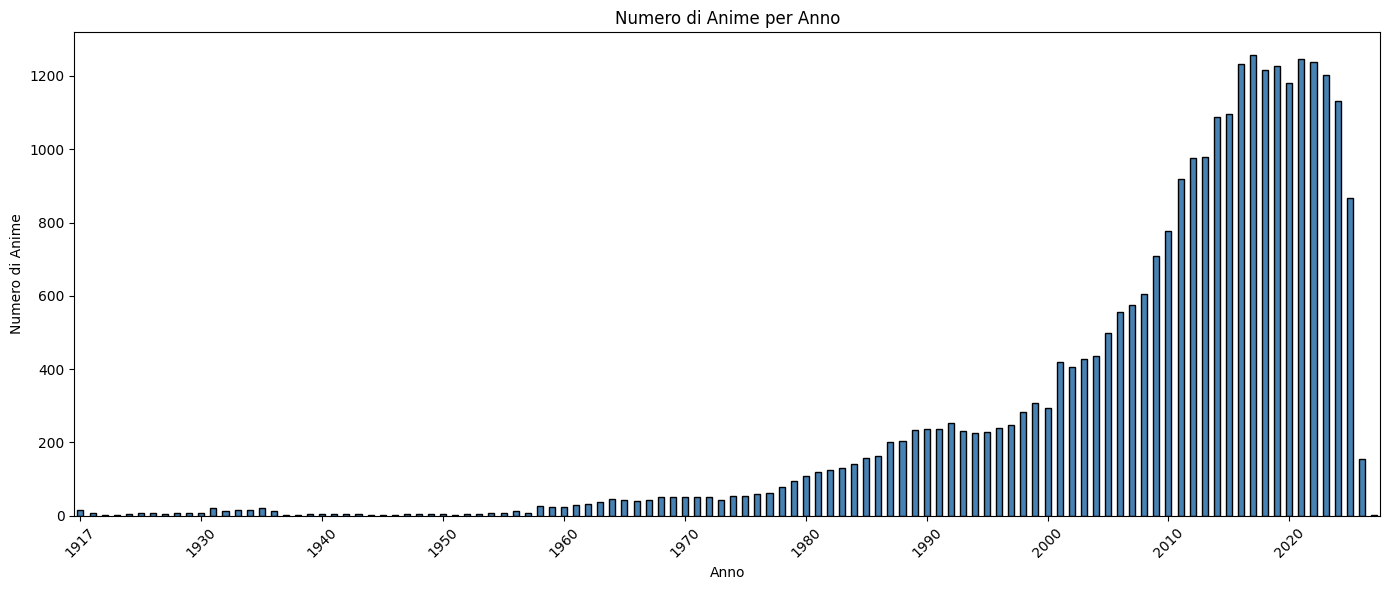

In [57]:
anime_per_anno = details_df.groupby(details_df['start_date'].dt.year).size()
plt.figure(figsize=(14, 6))
anime_per_anno.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Numero di Anime per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Anime')
years = anime_per_anno.index.tolist()
plt.xticks(range(0, len(years), 10), [str(int(years[i])) for i in range(0, len(years), 10)], rotation=45)
plt.tight_layout()
plt.show()

Da questo grafico possiamo notare come il periodi d'oro i valori sono crescuti in maniera esponeziale tra il 2010 e il 2020.
Visto che abbiamo parlato di anni perchè non chiederci in quale stagione vengono prodotti più anime.

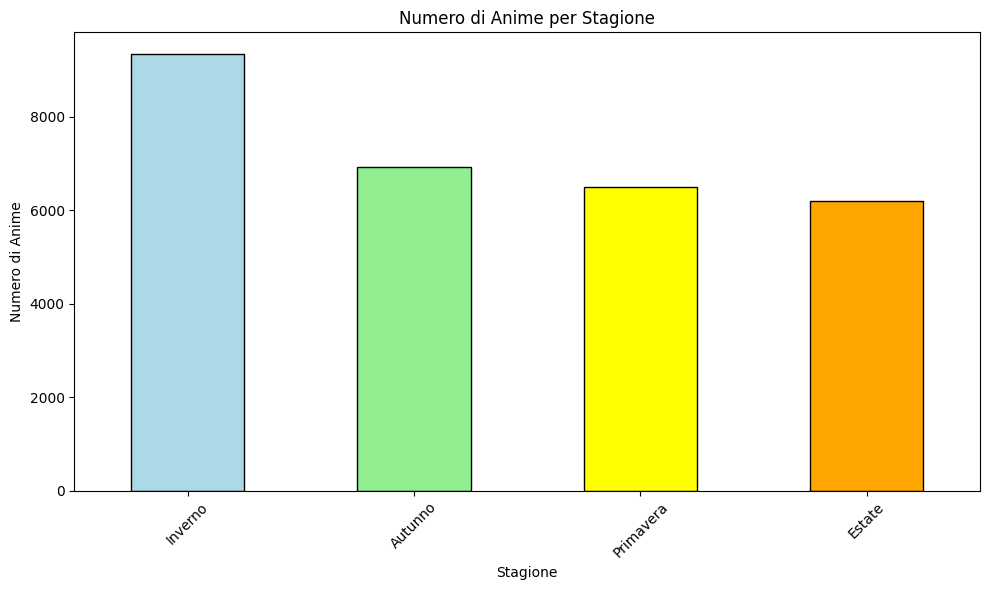

In [58]:
# Creare una colonna stagione basata sul mese
def get_season(month):
    if month in [12, 1, 2]:
        return 'Inverno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Estate'
    else:
        return 'Autunno'

details_df['season'] = details_df['start_date'].dt.month.apply(get_season)

# Contare gli anime per stagione
season_counts = details_df['season'].value_counts()

# Grafico
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'yellow', 'orange'], edgecolor='black')
plt.title('Numero di Anime per Stagione')
plt.xlabel('Stagione')
plt.ylabel('Numero di Anime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si può notare come in inverno sono stati fatti uscire più anime e in estate meno, ha perfettemante senso considerando che in estate...

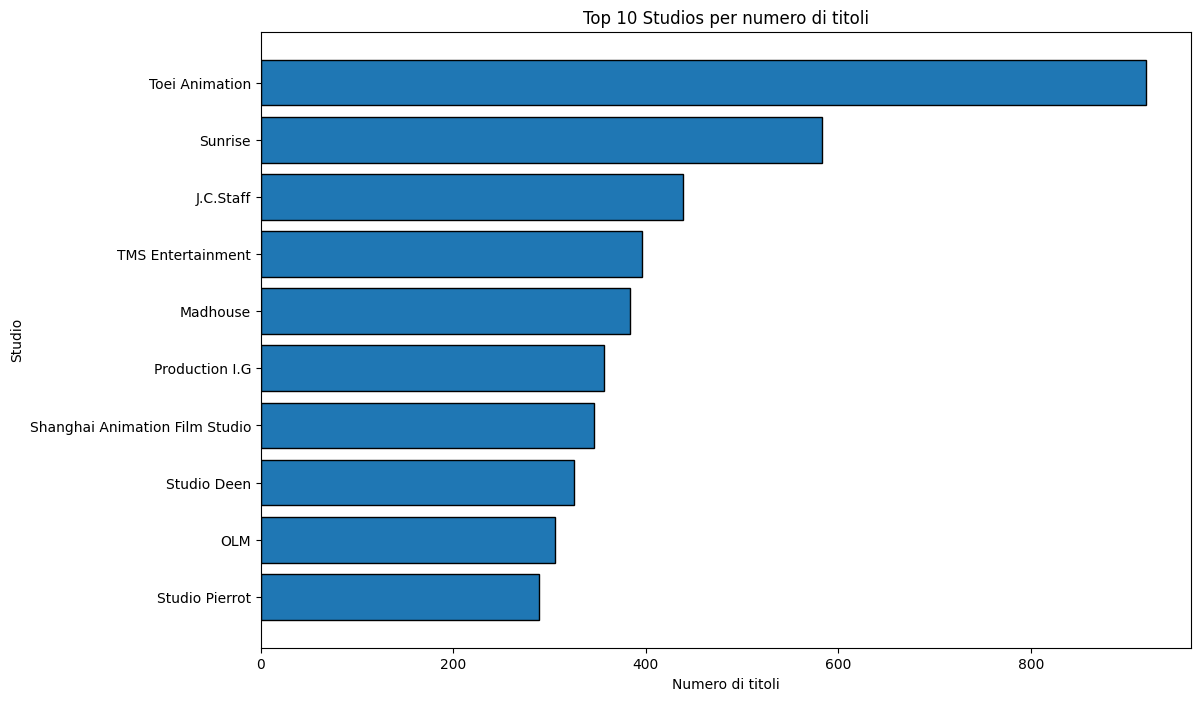

In [71]:
# Top 10 studios per numero di titoli
from collections import Counter
all_studios = []
for studios in details_df['studios'].dropna():
    studios_list = studios.split(', ')
    for s in studios_list:
        cleaned = s.strip("[]'\"")  # Rimuovi parentesi quadre e virgolette
        if cleaned:  # Salta studios vuoti
            all_studios.append(cleaned)

studios_counts = Counter(all_studios)
top_studios = studios_counts.most_common(10)

# Grafico
studios, counts = zip(*top_studios)
plt.figure(figsize=(12, 8))
plt.barh(studios, counts, edgecolor='black')
plt.title('Top 10 Studios per numero di titoli')
plt.xlabel('Numero di titoli')
plt.ylabel('Studio')
plt.gca().invert_yaxis()  # Per avere il top al top
plt.show()

possiavìmo vedere come lo studio che ha prodotto più titoli sia "Toei Animation" ed infatti è un famosissimo studio presente in giappone (patria degli naime).

# Favs
Analizziamo adesso il file favs.csv nel quale sono segnati i dati per ogni utente.
Secondo me è inutile analizzare favs (per lo meno da solo) perchè ci dice per ogni utente la sua libreria dei preferiti.

# Person
Analisi dei file legati alle persone che hanno lavorato agli anime nel corso degli anni.
Grazie ai dati contenuti in questo file possiamo ricavare informazioni interessanti sulle persone che lavorano dietro le quinte del mondo anime, per esempio età e luogo in cui sono nati.

In [4]:
person_df = pd.read_csv('person_details.csv')
person_df = person_df.drop(columns=['url', 'website_url', 'image_url', 'given_name', 'family_name'])
person_df.drop_duplicates()
person_df.dropna()
person_df['birthday'] = pd.to_datetime(person_df['birthday'], format='ISO8601', errors='coerce')
person_df.head()

,person_mal_id,name,birthday,favorites,relevant_location
0,1,Tomokazu Seki,1972-09-08 00:00:00+00:00,6219,"Berlin, Germany"
1,2,Tomokazu Sugita,1980-10-11 00:00:00+00:00,47666,"Los Angeles, USA"
2,3,Satsuki Yukino,1970-05-25 00:00:00+00:00,1777,"Madrid, Spain"
3,4,Aya Hirano,1987-10-08 00:00:00+00:00,18374,"Paris, France"
4,5,Kenichi Suzumura,1974-09-12 00:00:00+00:00,5176,"Osaka, Japan"


Essendo presente nel file una colonna contenenete la data di nascita degli operatori ci viene spontaneo interessarci alla distribuzione dei dati stessi per capire qual'è l'età media delle persone che lavorano alla produzione di anime.

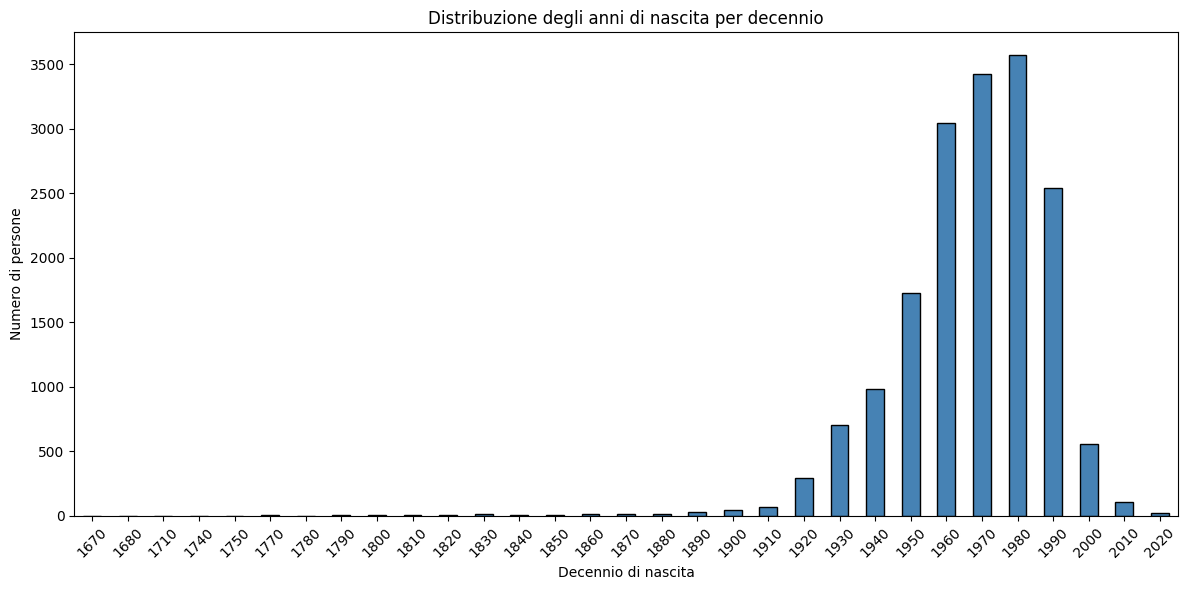

In [ ]:
plt.figure(figsize=(12, 6))
person_df['decade'] = (person_df['birthday'].dt.year // 10 * 10).astype('Int64')
person_df['decade'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='steelblue')
plt.title('Distribuzione degli anni di nascita per decennio')
plt.xlabel('Decennio di nascita')
plt.ylabel('Numero di persone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dal grafico vediamo subito alcuni dati che si discostano dal centro arrivando addirittura al 1770, ed è impossibile pensare che in quel periodo storico esistesse già qualcuno che lavorasse a questo mondo.
Cerchiamo quindi di capire come mai sono registrate queste persone.

In [ ]:
oldest_person = person_df.loc[person_df['birthday'].idxmin()]
oldest_person

person_mal_id                            24939
name                     Antonio Lucio Vivaldi
birthday             1678-03-04 00:00:00+00:00
favorites                                   99
relevant_location                New York, USA
decade                                    1670
Name: 17765, dtype: object

Dopo aver analizzato i dati abbiamo pensati di lasciare come esempio il caso di Antonio Vivaldi, questo esempio è perfetto per farci capire che le persone registrate in quegli anni non appartenenvano al mondo degli anime ma alcuni loro lavori si possono trovare nei film o nelle serie, in questo caso si tratta probabilmente di colonne sonore essendo stato Vivaldi un compositore.

# person works

In [8]:
personAW_df = pd.read_csv('person_anime_works.csv')
personAW_df = personAW_df.drop(columns=['anime_mal_id'])
personAW_df.drop_duplicates(subset=['person_mal_id'], inplace=True)
personAW_df.head()
personVW_df = pd.read_csv('person_voice_works.csv')
personVW_df = personVW_df.drop(columns=['anime_mal_id', 'character_mal_id'])
personVW_df.head()
# Merge sequentially (fix typo 'hoew' -> 'how' and don't pass three dataframes to pd.merge)
personVW_df = pd.merge(personVW_df, personAW_df, on='person_mal_id', how='left')
personVW_df.drop_duplicates(subset=['person_mal_id'], inplace=True)
personVW_df.head()

,person_mal_id,role,language,position
0,1,Main,Japanese,Theme Song Performance
524,2,Supporting,Japanese,Theme Song Performance
1185,3,Supporting,Japanese,Theme Song Performance
1482,4,Supporting,Japanese,Theme Song Performance (ED10)
1673,5,Main,Japanese,Theme Song Performance


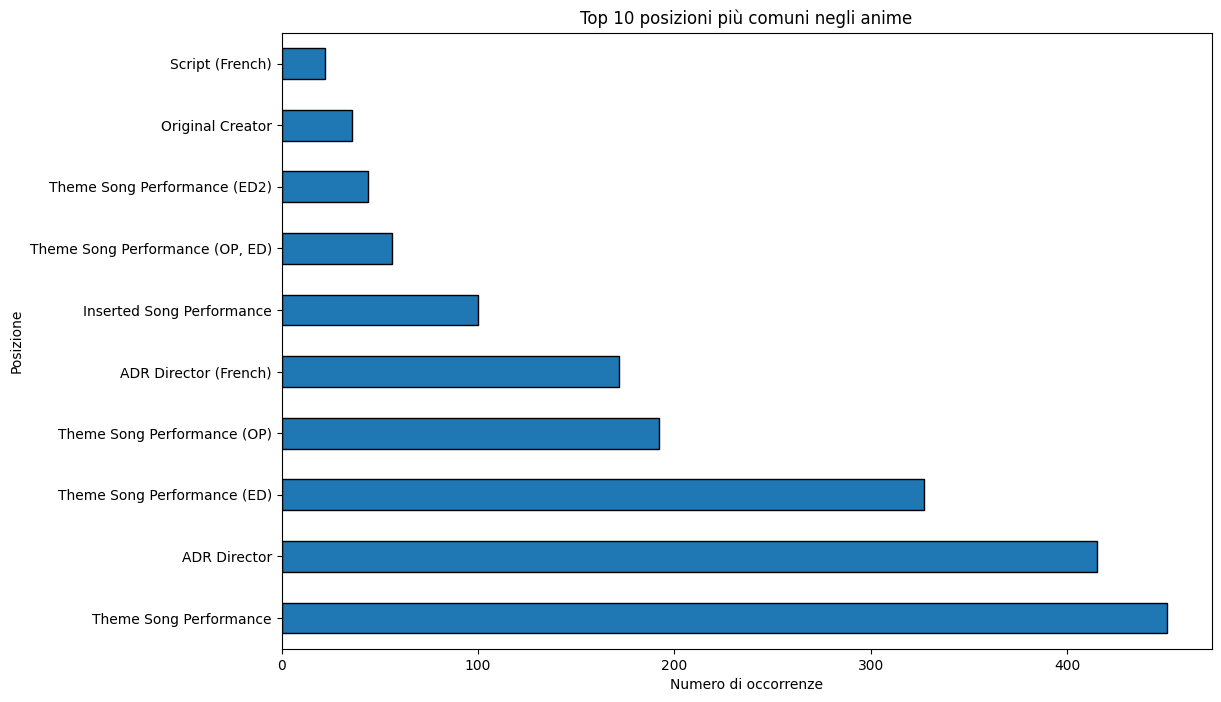

In [9]:
plt.figure(figsize=(12, 8))
personVW_df['position'].value_counts().head(10).plot(kind='barh', edgecolor='black')
plt.title('Top 10 posizioni più comuni negli anime')
plt.xlabel('Numero di occorrenze')
plt.ylabel('Posizione')
plt.show()

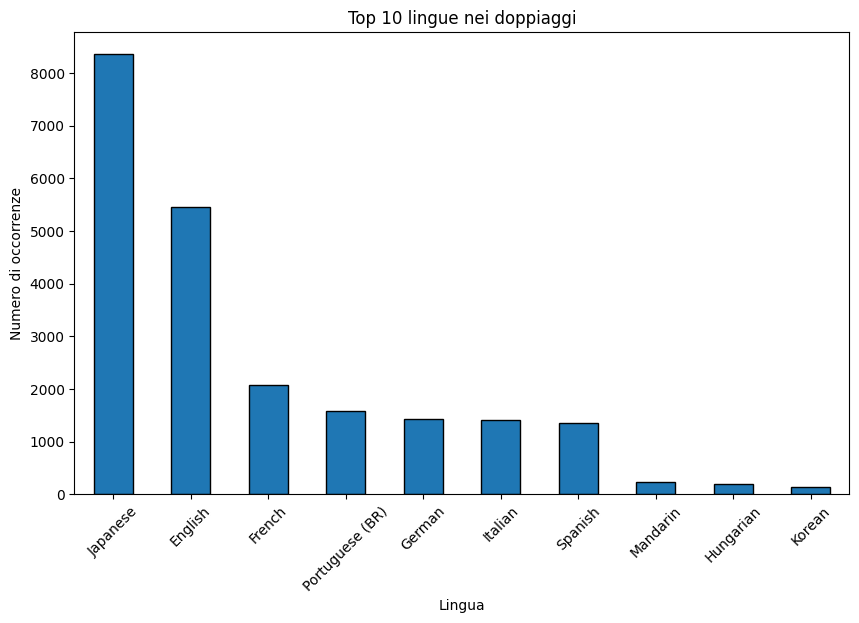

In [10]:
plt.figure(figsize=(10, 6))
personVW_df['language'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 lingue nei doppiaggi')
plt.xlabel('Lingua')
plt.ylabel('Numero di occorrenze')
plt.xticks(rotation=45)
plt.show()

Come possiamo vedere la lingua giapponese è la più comne (Molto prevedible) però possiamo notare come l'ingelse è sopra la metà e ha molto distacco anche delle altre lingue.

In [13]:
profile = pd.read_csv('profiles.csv')
profile = profile.drop(columns=['watching', 'completed', 'on_hold', 'dropped', 'plan_to_watch'])
profile = profile.drop_duplicates()
profile = profile.dropna()
profile.head()

,username,gender,birthday,location,joined
15,RinsAl,Male,"Jul 7, 1989",Japan,"Oct 19, 2009"
19,ishimori,Female,"Apr 17, 2000",France,"Dec 7, 2018"
25,Rins_,Male,"Jul 15, 1988",Japan,"Jun 6, 2013"
29,FollowValen,Male,"Jul 8, 1996",Spain,"Oct 7, 2018"
30,ishiruchan,Female,"Jun 16, 2003",China,"Aug 26, 2018"


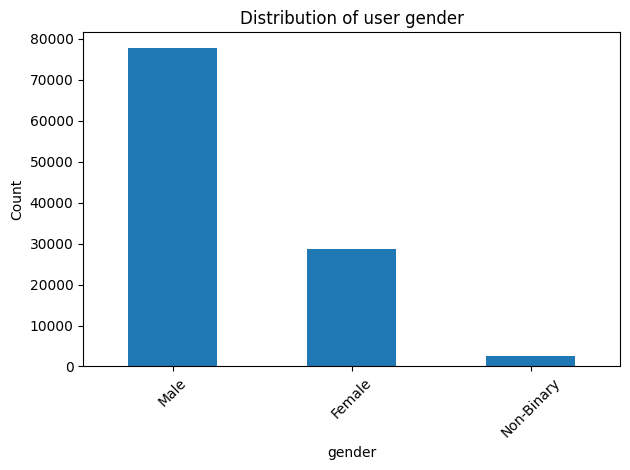

In [16]:
genere = profile
genere = genere.drop(columns=['birthday', 'location', 'joined'])
genere = genere.drop_duplicates()
genere = genere.dropna()
genere['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of user gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Possimo notare come il pubblico è prevalentemente maschile. Però ci possiamo chedere com'è l'andamento degli utenti negli anni per capire se il genere femminile è in aumento oppure i non-binary.

<Figure size 1400x700 with 0 Axes>

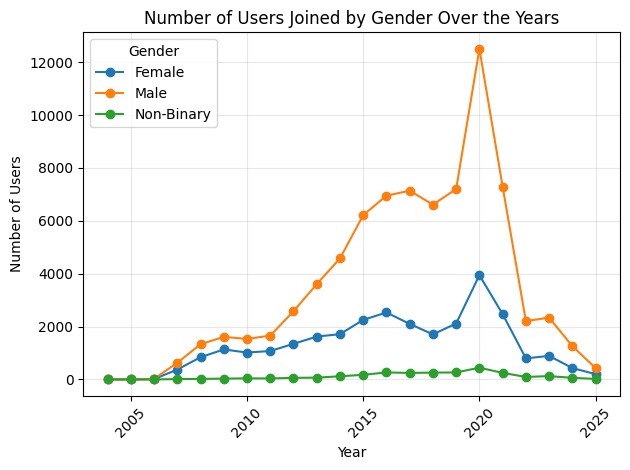

In [31]:
# Count users by year and gender
profile['joined'] = pd.to_datetime(profile['joined'])
users_by_year_gender = profile.groupby([profile['joined'].dt.year, 'gender']).size().unstack(fill_value=0)

# Plotting - Grafico a linee per vedere chiaramente il trend di ogni genere
plt.figure(figsize=(14, 7))
users_by_year_gender.plot(kind='line', marker='o')
plt.title('Number of Users Joined by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Possimao subito notare un picco di iscrizioni in tutte e tre le categorie nel 2020 (anno del COVID), e l'andamento è simile per tutti quindi non ci sono generi in aumento o in calo. Inoltre possiamo vedere come negli ultimi anni c'è stato un calo considerevole ma è plausibile perchè le persone sono già iscrtitte precedentemente.

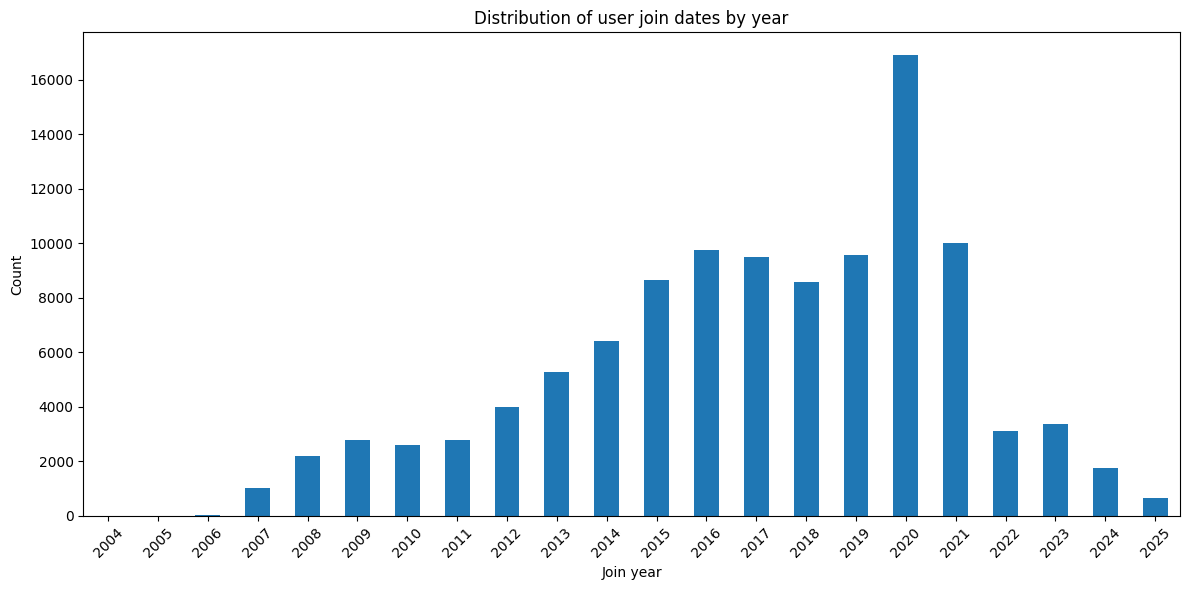

In [45]:
iscrizioni = profile.drop(columns=['gender', 'birthday', 'location'])
iscrizioni = iscrizioni.drop_duplicates()
iscrizioni = iscrizioni.dropna()

# Convert 'joined' to datetime and extract year
iscrizioni['joined_dt'] = pd.to_datetime(iscrizioni['joined'], errors='coerce')
iscrizioni = iscrizioni.dropna(subset=['joined_dt']).copy()
iscrizioni['join_year'] = iscrizioni['joined_dt'].dt.year.astype(int)

# Plot distribution by year
year_counts = iscrizioni['join_year'].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(12,6))
plt.title('Distribution of user join dates by year')
plt.xlabel('Join year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

possiamo vedere come i dati combaciano abbastanza con il grafico precedente, con iìun picco nel 2020

Ora per curiosità possiamo visualizzare qual'è la distribuxione dell'età degli utenti

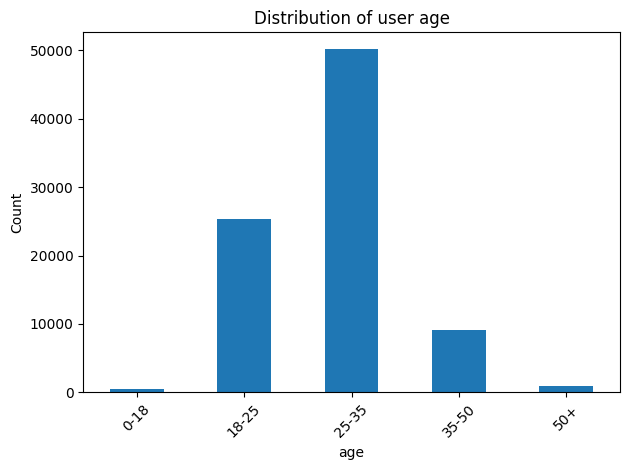

In [37]:
età = profile
età = età.drop(columns = ['gender', 'location', 'joined'])
età = età.drop_duplicates()
età = età.dropna()

# Extract 4-digit year from 'birthday' strings (some entries lack year e.g. "Aug 4")
età['birth_year'] = età['birthday'].astype(str).str.extract(r'(\d{4})')[0].astype(float)

# Keep only rows with a valid year and compute age
età = età.dropna(subset=['birth_year']).copy()
current_year = datetime.now().year
età['age'] = current_year - età['birth_year']

# Define bins and labels for age groups
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-18', '18-25', '25-35', '35-50', '50+']

# Create age groups
età['age_group'] = pd.cut(età['age'], bins=bins, labels=labels, right=False)

età['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of user age')
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Possiamo notare come la fascia d'età principale è di 25-35 anni. Possiamo notare acnhe una cosa più curiosa, ovvero gli over 50 sono di più rispetto agli under 18.
Infine possiamo vedere da quali paesi provengono principalmente gli utenti.

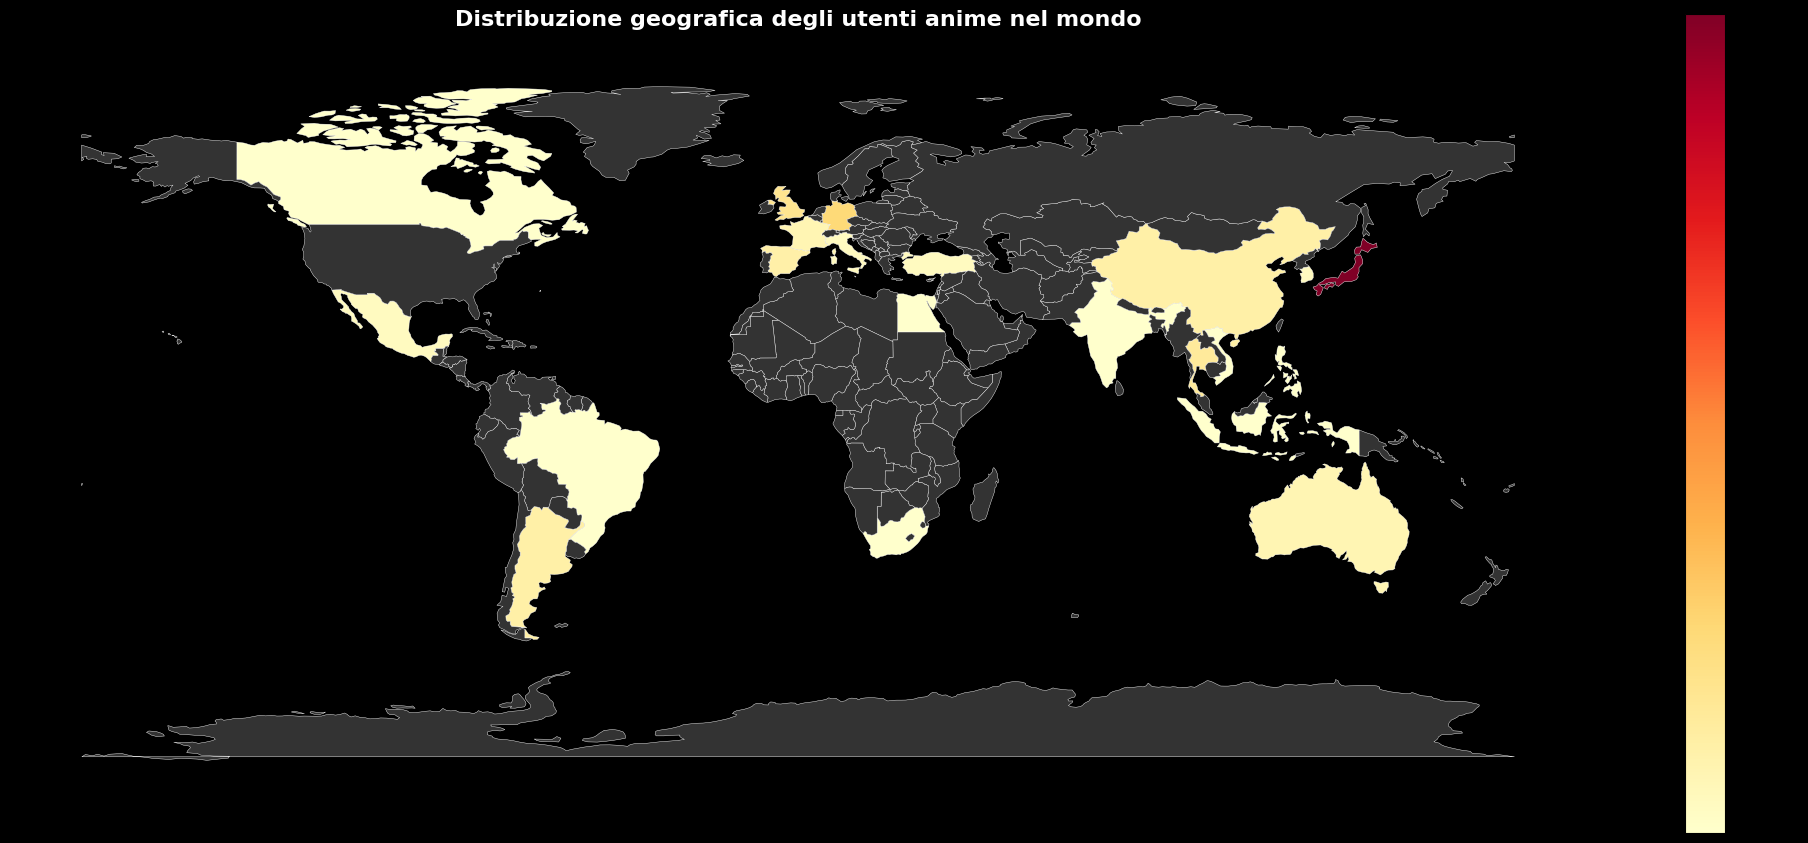

In [ ]:
GeoJSON = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
world = gpd.read_file(GeoJSON)

# Clean names
profile['location'] = profile['location'].astype(str).str.strip()
world['name'] = world['name'].str.strip()

# Aggregate counts of users per country and create the 'value' column
location_counts = profile['location'].value_counts().reset_index()
location_counts.columns = ['name', 'value']
location_counts['name'] = location_counts['name'].str.strip()

# Merge aggregated data (counts) into the GeoDataFrame
world_data = world.merge(location_counts, how='left', on='name')

fig, ax = plt.subplots(figsize=(20, 12), facecolor='black')
ax.set_facecolor('black')

world_data.plot(
    column="value",
    cmap="YlOrRd",
    legend=True,
    legend_kwds={
        "label": "Numero di utenti",
        "orientation": "vertical",
        "shrink": 0.7
    },
    missing_kwds={
        "color": "#333333",
        "label": "Dati non disponibili"
    },
    edgecolor="white",
    linewidth=0.3,
    ax=ax
)

ax.set_title("Distribuzione geografica degli utenti anime nel mondo", fontsize=16, fontweight='bold', pad=20, color='white')
ax.set_axis_off()

# Cambia il colore della colorbar
try:
    cbar = ax.collections[0].colorbar
    if cbar:
        cbar.ax.tick_params(colors='white')
        cbar.ax.yaxis.label.set_color('white')
except:
    pass

plt.tight_layout()
plt.show()

Come possiamo vedere dalla mappa il giappone (patria degli anime) è il paese in cui ci sono più utenti in assoluto, altri paesi che vale la pena citare sono cina, australia, europa e alcune zone americane.

# Analizziamo il file stats.csv

In [22]:
statsDF = pd.read_csv('stats.csv')
statsDF = statsDF.drop_duplicates(subset=['mal_id'])
statsDF = statsDF.dropna()
name = details_df
name = name.drop(columns=['title_japanese', 'url', 'image_url', 'type', 'status', 'score', 'scored_by', 'start_date', 'end_date', 'synopsis', 'rank', 'popularity', 'members', 'favorites', 'genres', 'studios', 'themes', 'demographics', 'source', 'rating', 'episodes', 'season', 'year', 'producers', 'explicit_genres', 'licensors', 'streaming'])
statsDF = pd.merge(statsDF, name, left_on='mal_id', right_on='mal_id', how='left')
statsDF.head()

completed_anime = statsDF
completed_anime = completed_anime.drop(columns=['watching', 'on_hold', 'dropped', 'plan_to_watch', 'total', 'score_1_votes', 'score_1_percentage', 'score_2_votes', 'score_2_percentage', 'score_3_votes', 'score_3_percentage', 'score_4_votes', 'score_4_percentage', 'score_5_votes', 'score_5_percentage', 'score_6_votes', 'score_6_percentage', 'score_7_votes', 'score_7_percentage', 'score_8_votes', 'score_8_percentage', 'score_9_votes', 'score_9_percentage', 'score_10_votes', 'score_10_percentage'])
completed_anime = completed_anime.nlargest(5, 'completed')
completed_anime.head()
statsDF.head()


,mal_id,watching,completed,on_hold,dropped,plan_to_watch,total,score_1_votes,score_1_percentage,score_2_votes,score_2_percentage,score_3_votes,score_3_percentage,score_4_votes,score_4_percentage,score_5_votes,score_5_percentage,score_6_votes,score_6_percentage,score_7_votes,score_7_percentage,score_8_votes,score_8_percentage,score_9_votes,score_9_percentage,score_10_votes,score_10_percentage,title
0,59356,7,146,4,20,20,197,2.0,2.2,0.0,0.0,3.0,3.3,6.0,6.6,25.0,27.5,33.0,36.3,19.0,20.9,2.0,2.2,0.0,0.0,1.0,1.1,-Socket-
1,56036,21,770,8,29,113,941,5.0,1.0,6.0,1.2,8.0,1.6,14.0,2.8,50.0,9.9,138.0,27.4,144.0,28.6,81.0,16.1,17.0,3.4,40.0,8.0,......
2,2928,451,14953,302,349,6472,22527,101.0,1.0,93.0,1.0,164.0,1.7,457.0,4.7,1184.0,12.1,2054.0,21.1,2709.0,27.8,1500.0,15.4,875.0,9.0,608.0,6.2,.hack//G.U. Returner
3,3269,726,22790,452,537,9762,34267,120.0,0.8,156.0,1.0,260.0,1.7,560.0,3.6,1270.0,8.3,2457.0,16.0,4157.0,27.0,3075.0,20.0,1919.0,12.5,1400.0,9.1,.hack//G.U. Trilogy
4,4469,241,6918,182,266,3528,11135,83.0,1.9,104.0,2.4,182.0,4.2,292.0,6.8,683.0,15.8,888.0,20.6,871.0,20.2,592.0,13.7,308.0,7.1,315.0,7.3,.hack//G.U. Trilogy: Parody Mode
